# Social Network Analysis - Exercise Sheet 1a)



### Generation of Graphs for given Degree Sequences

In the following we present two slightly different algorithms;
one constructs a graph with a *sparse core*, the other constructs a graph with a *dense core*.
We assume that the sum of all degrees is more then $2(n-1)$ where n is the number of nodes.

For both algorithms we need a subroutine called `connectivity`. This subroutine first of all checks wheter the constructed graph is connected. 
If the graph $G$ is not connected, it finds a connected component that contains a cycle. A cycle is a walk of length at least 3 where the starting and end point coincide and the corresponding sequence of traversed edges consists only of pairwise different edges.
Such a connected component must exist because of the assumption on the degrees made above.
Let $uv$ be an edge in the cylce, and $st$ be an edge in another connected component.
We now delete edges $uv$ and $st$, and insert edges $us$ and $vt$ to the network.

*Sparse Core.*
In this section we describe an algorithm that constructs a graph with a given degree sequence that additionally is sparse. 
We are given a degree sequence $d_1 \geq d_2 \geq \cdots \geq d_n$, and we assign the vertices $v_1, v_2,\ldots,v_n$ to those degrees.
As long as there exists a vertex $v_i$ with $d_i>0$, we choose the vertex $v_l$ with the currently lowest degree $d_l$.
Then we insert $d_l$ edges from $v_l$ to the first $d_l$ vertices with highest degree.
After that we update the residual vertex degrees $d_i = d_i-1$ for $i=1,\ldots,d_l$ and $d_l=0$.
Last,but not least, we have to check connectivity and, if necessary, establish it using the above mentioned method `connectivity`.

*Dense Core.*
To construct a graph with a dense core for a certain degree sequence, we only have to change the above algorithm for sparse cores slightly.
As long as there exists a vertex $v_i$ with $d_i>0$ we now choose such a vertex arbitrarily and insert edges from $v_i$ to the $d_i$ vertices with the highest residual degrees.
After that we only have to update the residual degrees and establish connectivity if it is not given.


##### Exercise 1
Read the above text and implement the three methods `connectivity`, `sparse_core` and `dense_core` accordingly.
Comment your code properly.

##### Hints
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 17.11.2023 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library.
* Below the Implementation section is a Test section with three degree sequences that can be used to check your code.


### Implementation

Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

If you do not want to use the NetworkX library add a method to extract the degree sequence from your graph.


In [56]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

'''own functions'''
def create_edges(G: nx.Graph, degree_seq: list[int], start_node: int, start_node_degree: int):
    '''
    :param G: graph
    :param degree_seq: list of degrees of nodes, which have to be added to the graph
    :param start_node: node with lowest degree, from which edges are created
    :param start_node_degree: degree of start_node, i.e. number of edges to be created
    :return: -

    creates start_node_degree many edges form start_node to highest degree nodes
    '''
    sorted_degree_sequence = np.argsort(degree_seq).tolist()   # indices of nodes from low to high degree
    end_nodes = sorted_degree_sequence[-(start_node_degree + 1):]   # end_nodes indices: (start_node_degree + 1) many highest degree nodes; 1 is added to replace start_node if it is in end_nodes
    if start_node in end_nodes:
        end_nodes.remove(start_node)
    else:   # remove lowest degree node
        end_nodes = end_nodes[1:]

    for end_node in end_nodes:
        G.add_edge(start_node, end_node)
        degree_seq[start_node] -= 1
        degree_seq[end_node] -= 1



'''pre defined functions'''

def connectivity(graph: nx.Graph):
    '''
    Takes a graph as input, if the graph is not connected 
    it connects the graphs components and returns a connected graph.
    '''
    # check if graph is connected 
    if not nx.is_connected(graph):
        # find a cycle
        cycle = nx.find_cycle(graph)
        e = cycle[0]  # {u,v} is an edge of a cycle
        u,v = e[0], e[1]

        # other connected component
        connected_components = list(nx.connected_components(graph))
        for component in connected_components:  # one component is the cycle, >= 1 contains the rest of the graph
            if u not in component:
                s = list(component)[0]  # arbitrary node from other component
                t = list(graph.neighbors(s))[0] # neighbor of s, i.e. {s,t} is an edge

                graph.remove_edge(s,t)
                graph.remove_edge(u,v)
                graph.add_edge(s,u)
                graph.add_edge(t,v)

                if nx.find_cycle(graph) and not nx.is_connected(graph): # more than one cycle
                    return connectivity(graph)


    return graph


def sparse_core(degree_sequence):
    '''
    Generates a connected sparse core graph for a given degree sequence.
    
    Parameters
    ----------
    degree_sequence : list of int
    
    
    Returns
    -------
    graph
    '''
    G = nx.Graph()
    degree_seq = degree_sequence.copy() # use copy to not change original degree sequence

    # number of nodes == length of degree sequence
    nodes = list(range(1, len(degree_seq)))
    G.add_nodes_from(nodes)
    
    # degree sequence[i] = number of edges for node i
    while sum(degree_seq) > 0:
        valid_idx = np.where(np.array(degree_seq) > 0)[0] # indices of nodes with degree > 0
        start_node = valid_idx[np.array(degree_seq)[valid_idx].argmin()]    # index of node with lowest degree
        start_node_degree = degree_seq[start_node]  # number of edges to be created for start_node
     
        create_edges(G=G, degree_seq=degree_seq, start_node=start_node, start_node_degree=start_node_degree)

    G = connectivity(G)
    return G


def dense_core(degree_sequence):
    '''
    Generates a connected dense core graph for a given degree sequence.
    
    Parameters
    ----------
    degree_sequence : list of int
    
    
    Returns
    -------
    graph
    '''
    G = nx.Graph()
    degree_seq = degree_sequence.copy() # use copy to not change original degree sequence

    # number of nodes == length of degree sequence
    nodes = list(range(1, len(degree_seq)))
    G.add_nodes_from(nodes)

    while sum(degree_seq) > 0:
        valid_idx = np.where(np.array(degree_seq) > 0)[0] # indices of nodes with degree > 0
        start_node = int(valid_idx[random.choice(np.array(degree_seq)[valid_idx])])    # abritrary node with degree > 0
        start_node_degree = degree_seq[start_node]  # number of edges to be created for start_node
     

        create_edges(G=G, degree_seq=degree_seq, start_node=start_node, start_node_degree=start_node_degree)
    
    G = connectivity(G)
    return G


### Tests 
This section contains three degree sequences that can be used to test if the implemented methods generate graphs with the correct degree sequence.
Further it contains code to draw the graphs and inspect them visually.

dense core :



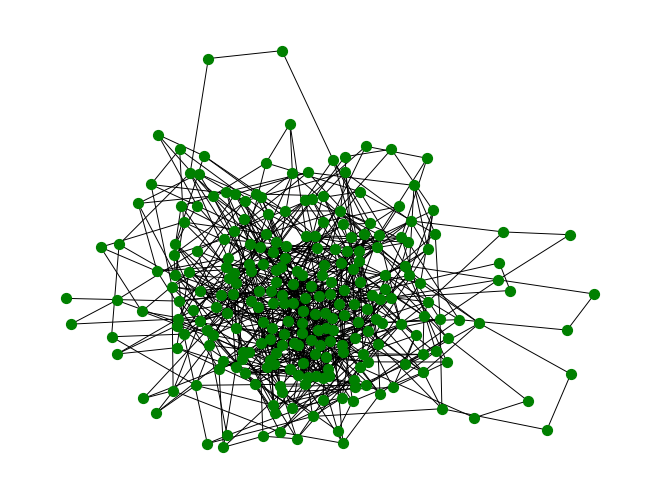

sparse_core:



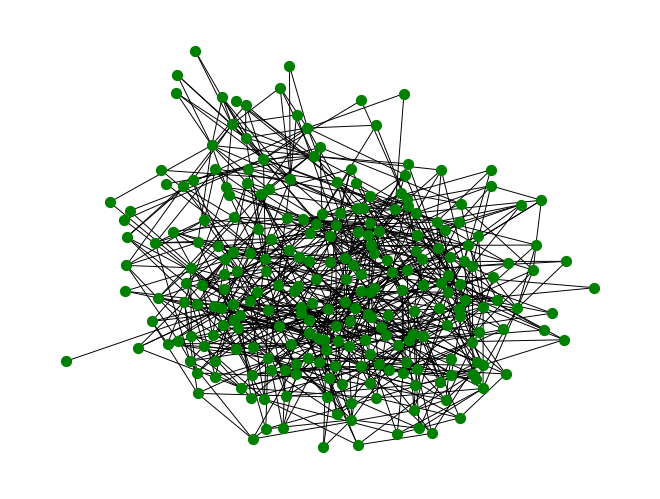

dense core :



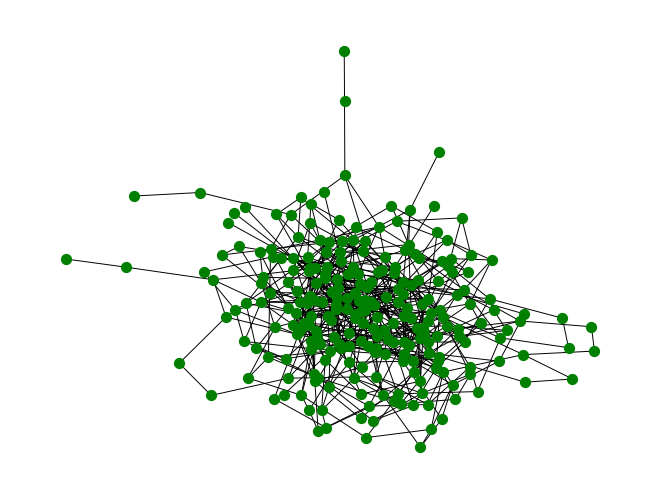

sparse_core:



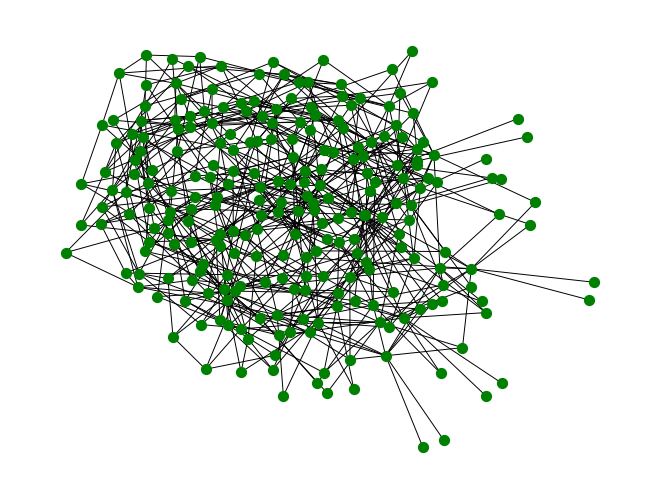

dense core :



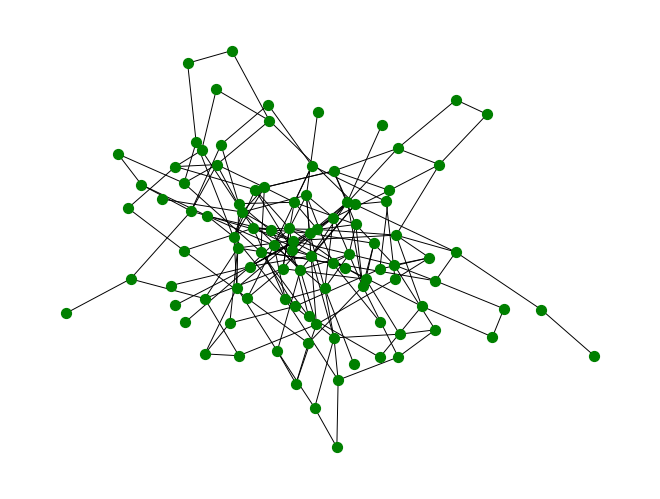

sparse_core:



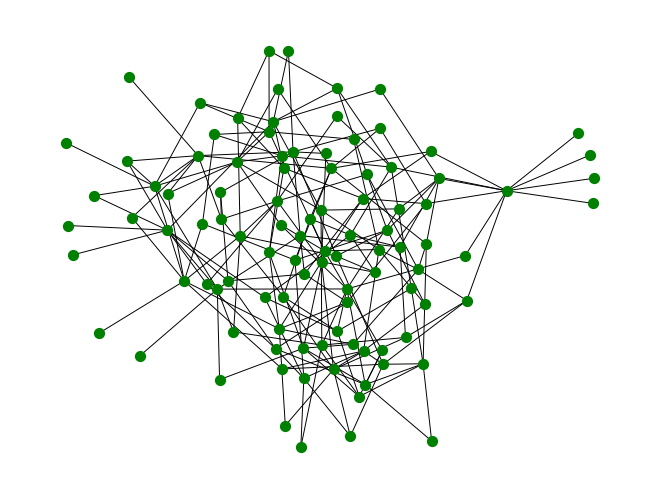

In [57]:
import textdistance

degree_sequences = [
    [14, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1],
    [11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [10, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

for dseq in degree_sequences:
    print('dense core :\n')
    G = dense_core(dseq)
    degree_sequence = sorted([v for n,v in nx.degree(G)],reverse=True)
    assert(degree_sequence == dseq)
    nx.draw(G,node_color='g',node_size=50,width=0.7) 
    plt.draw() 
    plt.show()
    
    print('sparse_core:\n')
    G = sparse_core(dseq)
    degree_sequence = sorted([v for n,v in nx.degree(G)],reverse=True)
    assert(degree_sequence == dseq)
    nx.draw(G,node_color='g',node_size=50,width=0.7) 
    plt.draw() 
    plt.show()